<a href="https://colab.research.google.com/github/mikeldiokelly/Project/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import requests
from google.colab import drive
import tarfile
import nltk
import random
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
import plotly.express as px
from csv import reader
from csv import writer

In [2]:
drive.mount('/content/drive')
!ls -alh "/content/drive/My Drive/WashingtonPost.v2.tar.gz"
!tar xvzf "/content/drive/My Drive/WashingtonPost.v2.tar.gz"
data_file='/content/drive/My Drive/WashingtonPost.v2.tar.gz'

def get_full_content(doc):
  out_lst = list()
  for c in doc['contents']: 
    if 'content' in c:
      if type(c['content'])==str:
        out_lst.append(c['content'])
  return out_lst

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
-rw------- 1 root root 1.6G Dec 12 19:33 '/content/drive/My Drive/WashingtonPost.v2.tar.gz'
WashingtonPost.v2/
WashingtonPost.v2/MD5SUMS
WashingtonPost.v2/README.md
WashingtonPost.v2/scripts/
WashingtonPost.v2/data/
WashingtonPost.v2/data/TREC_Washington_Post_collection.v2.jl
WashingtonPost.v2/scripts/wapo-print-docids.py
WashingtonPost.v2/scripts/wapo-docids-dupes
WashingtonPost.v2/scripts/wapo-remove-exact-duplicates.py


In [5]:
drive.mount('/content/drive')

customer_data = pd.read_csv('/content/drive/My Drive/div_data.csv')
customer_data.shape  
customer_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Line,block,Romney,year,years,people,Jan.,time,Obama,percent,role,government,name,New,Gingrich,U.S.,game,way,team,president,House,state,St.,bio,season,span,week,Virginia,school,campaign,company,Center,business,country,points,world,work,home,John,officials,...,Museum,Jackson,banks,owner,agreement,radio,headlines,trip,return,Times,senator,competition,Wilson,Tebow,Staff,hands,Sarah,Jones,Letters,deficit,levels,Israel,Duke,hundreds,details,mind,Arts,sign,Defense,blog,Jim,Occupy,population,miles,pass,Education,talk,mortgage,Boston,model
0,1,0.000000,0.0,0.454442,0.227221,0.000000,0.0,0.000000,0.0,0.00000,0.227221,0.000000,0.227221,0.681663,0.0,0.681663,0.000000,0.000000,0.227221,0.0,0.0,0.000000,0.0,0.227221,0.000000,0.454442,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.044990,0.00000,0.000000,0.227221,0.0,...,0.0,0.000000,0.0,0.0000,0.227221,0.000000,0.227221,0.227221,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.454442,0.000000,0.0,0.000000,0.0,0.0,0.0
1,2,0.000000,0.0,0.575126,0.287563,0.431344,0.0,0.287563,0.0,0.00000,0.143781,0.143781,0.143781,0.287563,0.0,0.575126,0.000000,0.000000,0.143781,0.0,0.0,0.431344,0.0,0.143781,0.000000,0.287563,0.287563,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.862689,0.000000,1.581596,0.00000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0000,0.143781,0.000000,0.143781,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.431344,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.287563,0.0,0.0,0.0
2,3,0.000000,0.0,0.643501,0.214500,0.000000,0.0,0.214500,0.0,0.10725,0.107250,0.000000,1.608752,0.214500,0.0,0.429000,0.429000,0.214500,1.823252,0.0,0.0,0.107250,0.0,0.107250,0.321750,0.643501,0.000000,0.10725,0.107250,0.000000,0.0,0.0,0.0,0.107250,0.000000,0.000000,0.10725,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.2145,0.000000,0.000000,0.000000,0.000000,0.107250,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.214500,0.107250,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
3,4,0.318497,0.0,0.477745,0.079624,0.000000,0.0,0.557369,0.0,0.00000,0.079624,0.000000,0.079624,0.000000,0.0,0.000000,1.672108,0.318497,0.636993,0.0,0.0,0.000000,0.0,0.079624,1.353611,0.159248,0.000000,0.00000,0.000000,0.159248,0.0,0.0,0.0,0.000000,0.159248,0.000000,0.00000,0.079624,0.000000,0.0,...,0.0,0.079624,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.079624,0.0,0.0,0.0,0.079624,0.0,0.0,0.159248,0.0,0.318497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.273987,0.079624,0.0,0.0,0.000000,0.557369,0.0,0.000000,0.0,0.0,0.0
4,5,0.000000,0.0,0.229489,0.114745,0.000000,0.0,0.458979,0.0,0.00000,0.114745,0.000000,0.114745,0.688468,0.0,0.114745,1.032702,0.229489,0.000000,0.0,0.0,0.114745,0.0,0.229489,0.000000,0.000000,0.000000,0.00000,0.114745,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.114745,0.00000,0.114745,0.000000,0.0,...,0.0,0.000000,0.0,0.0000,0.000000,0.114745,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114745,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.344234,0.0,0.0,0.0


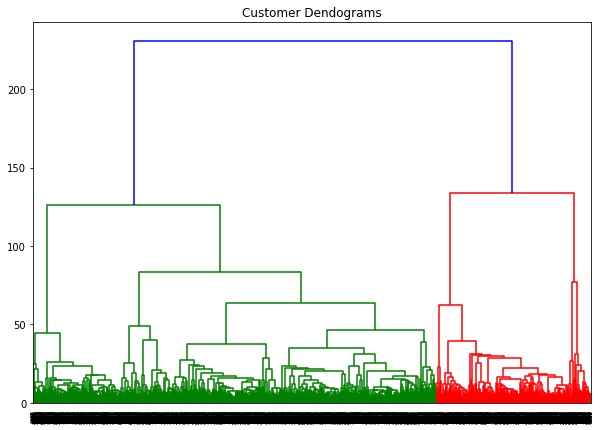

In [6]:
data = customer_data.iloc[:, 1:500].values

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [0]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
a=cluster.fit_predict(data)

In [0]:
n=0
while(n<cluster.n_clusters_):
  num=0
  while(num<10):
    print("CLUSTER ", n)
    for i in range(len(data)):
      if(a[i]==n):
        num+=1
        print("Line ", i+1, "->",a[i])

        with open('/content/WashingtonPost.v2/data/TREC_Washington_Post_collection.v2.jl') as fp:
          cnt=1
          line = fp.readline()
          while(cnt<i+1):
            doc = json.loads(line)
            if ("/2012/" in doc['article_url']):
              cnt+=1 
            line = fp.readline()
          print("Line {}: {}".format(cnt, line.strip()))

  n=n+1

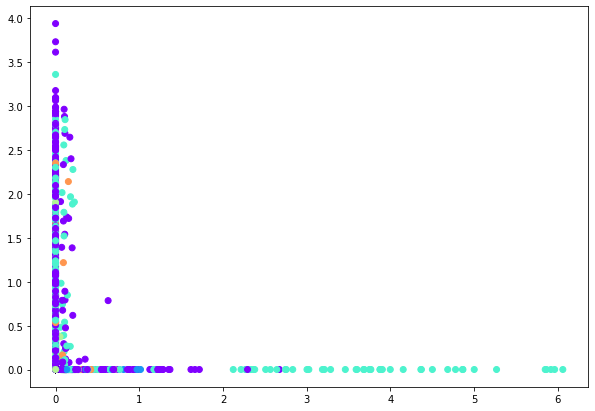

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

In [0]:
with open('/content/drive/My Drive/div_data.csv', 'r') as read_obj, \
        open('/content/drive/My Drive/clust_data.csv', 'w', newline='') as write_obj:
    csv_reader = reader(read_obj)
    csv_writer = writer(write_obj)
    i=0
    for row in csv_reader:
      if(i==0):
        row.append("Cluster")
        csv_writer.writerow(row)
      else:
        row.append(a[i-1])
        csv_writer.writerow(row)
      i+=1

In [13]:
df = pd.read_csv('/content/drive/My Drive/clust_data.csv')
fig = px.parallel_coordinates(df, color="Cluster",
                dimensions=["Line", "United", "States", "Romney", "Obama", "government", "U.S.", "Cluster"],
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()